In [54]:
import json
import numpy as np
import statistics
import os
import csv
import pandas as pd

In [55]:
def data_preparation(data):
    widthList = []
    heightList = []
    lengthList = []
    volumeList = []
    countStacking = 0
    countTurnover = 0
    boxesCount = 0
    for x in data['data_result']['boxes']:
        widthList.append(x['size']['width'])
        heightList.append(x['size']['height'])
        lengthList.append(x['size']['length'])
        volumeList.append(x['size']['width']*x['size']['height']*x['size']['length'])
        if x['stacking'] == True:
            countStacking += 1
        if x['turnover'] == True:
            countTurnover += 1
        boxesCount += 1
    meanWidth = statistics.mean(widthList)
    meanHeight = statistics.mean(heightList)
    meanLength = statistics.mean(lengthList)
    meanVolume = statistics.mean(volumeList)

    loadingWidth = data['data_result']['cargo_space']['loading_size']['width']
    loadingHeight = data['data_result']['cargo_space']['loading_size']['height']
    loadingLength = data['data_result']['cargo_space']['loading_size']['length']

    density_percent = data['data_result']['cargo_space']['calculation_info']['density_percent']

    values = [meanWidth, meanHeight, meanLength, meanVolume, countStacking,
              countTurnover, boxesCount, loadingWidth, loadingHeight,
              loadingLength, density_percent]
    
    return values

In [60]:
def write_to_csv(param):
  field = ['meanWidth','meanHeight','meanLength','meanVolume','countStacking',
           'countTurnover', 'boxesCount', 'loadingWidth', 'loadingHeight',
           'loadingLength', 'density_percent']
  filename = 'data.csv'
  with open(filename, 'w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(field)
    writer.writerows(param)

In [57]:
folder_path = 'ALGORITM/'

file_list = os.listdir(folder_path)

param = []

for file_name in file_list:
    # Проверяем, что файл имеет расширение .json
    if file_name.endswith('.json'):
        # Формируем полный путь к файлу
        file_path = os.path.join(folder_path, file_name)
        
        # Открываем файл и читаем его содержимое
        jsonFile = open(file_path, 'r', encoding='utf-8')
        # Загружаем JSON-данные
        data = json.load(jsonFile)
        new_row = data_preparation(data)
        param.append(new_row)
        jsonFile.close()


In [61]:
#запись в файл csv
write_to_csv(param)

In [62]:
df = pd.read_csv('data.csv')
df.head(5)

,meanWidth,meanHeight,meanLength,meanVolume,countStacking,countTurnover,boxesCount,loadingWidth,loadingHeight,loadingLength,density_percent
0,130.962963,175.966667,214.596296,5.811433e+06,270,270,270,800.0,2000.0,1200.0,81.76416
1,300.000000,250.000000,400.000000,3.000000e+07,33,0,33,800.0,2000.0,1200.0,82.50000
2,800.000000,1550.000000,1200.000000,1.488000e+09,0,0,17,2500.0,2100.0,7500.0,94.44444
3,278.787879,269.696970,415.151515,3.230303e+07,33,33,33,800.0,1650.0,1200.0,74.02778
4,800.000000,1600.000000,1200.000000,1.536000e+09,0,0,33,2490.0,2590.0,13490.0,100.00000


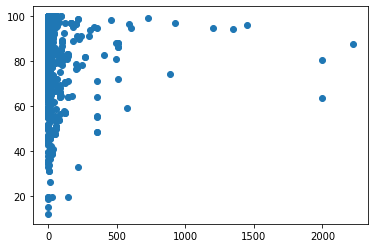

In [68]:
import matplotlib.pyplot as plt

%matplotlib inline
plt.scatter(df.countTurnover,df.density_percent)